In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

df_confirmed = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                sep=',',encoding='ISO8859-1')

df_deceased = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
                sep=',',encoding='ISO8859-1')


In [72]:
df_confirmed.tail(40)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
224,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,502,508,517,535,535,543,557,563,596,606
225,NaN,US,37.090200,-95.712900,1,1,2,2,5,5,...,699706,732197,758809,784326,811865,840351,869170,905358,938154,965785
226,NaN,Uzbekistan,41.377500,64.585300,0,0,0,0,0,0,...,1405,1490,1565,1627,1678,1716,1758,1804,1862,1869
227,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,204,227,256,256,285,288,311,318,323,325
228,NaN,Vietnam,16.000000,108.000000,0,2,2,2,2,2,...,268,268,268,268,268,268,268,270,270,270
229,NaN,Zambia,-15.416700,28.283300,0,0,0,0,0,0,...,52,57,61,65,70,74,76,84,84,88
230,NaN,Zimbabwe,-20.000000,30.000000,0,0,0,0,0,0,...,24,25,25,25,28,28,28,29,31,31
231,Diamond Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,0,0,0,0
232,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
233,NaN,Grenada,12.116500,-61.679000,0,0,0,0,0,0,...,14,14,14,14,14,15,15,15,18,18


In [73]:
countries = df_confirmed['Country/Region'].unique()
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 

In [74]:

all_countries = pd.DataFrame()

for c in countries:
    temp = df_confirmed[df_confirmed['Country/Region'] == c]
    temp = temp.groupby('Country/Region')
    temp = temp.sum().iloc[:,4:]
    temp = temp.T

    all_countries = pd.concat([all_countries,temp],axis=1)

def create_country_df(country):
    
    confirmed = all_countries[country]
    confirmed.index = pd.to_datetime(confirmed.index)
    factor = confirmed / confirmed.shift()
    data = pd.concat([confirmed,factor],axis=1)
    data.columns = ['confirmed','factor']
    data.factor.replace(np.inf,np.nan,inplace=True)
    data['inc'] = data['confirmed'] - data['confirmed'].shift()
    return data

confirmed_dict = dict()

for c in countries:
    confirmed_dict[c] = create_country_df(c)
    
thai = confirmed_dict['Thailand']
swe = confirmed_dict['Sweden']
ita = confirmed_dict['Italy']
korea = confirmed_dict['Korea, South']
us = confirmed_dict['US']
spain = confirmed_dict['Spain']
ger = confirmed_dict['Germany']

ita


,confirmed,factor,inc
2020-01-24,0,NaN,NaN
2020-01-25,0,NaN,0.0
2020-01-26,0,NaN,0.0
2020-01-27,0,NaN,0.0
2020-01-28,0,NaN,0.0
...,...,...,...
2020-04-22,187327,1.018319,3370.0
2020-04-23,189973,1.014125,2646.0
2020-04-24,192994,1.015902,3021.0
2020-04-25,195351,1.012213,2357.0


In [75]:
global_confirmed = df_confirmed.iloc[:,5:].sum()


In [76]:
global_deceased = df_deceased.iloc[:,5:].sum()
global_deceased.index = pd.to_datetime(global_deceased.index)
global_confirmed = df_confirmed.iloc[:,5:].sum()
global_confirmed.index = pd.to_datetime(global_confirmed.index)

global_data = pd.DataFrame(global_confirmed,columns=['confirmed'])
global_data['factor'] = global_data['confirmed'] / global_data['confirmed'].shift()
global_data['inc'] = global_data['confirmed'] - global_data['confirmed'].shift()
global_data['dead'] = global_deceased
global_data['dead_factor'] = global_data['dead'] / global_data['dead'].shift()
global_data['dead_inc'] = global_data['dead'] - global_data['dead'].shift()
global_data['pct_dead'] = 100 * global_data['dead'] /global_data['confirmed']
global_data.index = pd.to_datetime(global_data.index)
global_data.to_pickle('global_data.pkl')
global_data
global_data.describe()

,confirmed,factor,inc,dead,dead_factor,dead_inc,pct_dead
count,9.500000e+01,94.000000,94.000000,95.000000,94.000000,94.000000,95.000000
mean,6.434897e+05,1.100216,31604.478723,39170.421053,1.109476,2197.063830,4.069469
std,8.804255e+05,0.133695,35435.275067,60395.117339,0.113195,2817.353157,1.592364
min,6.540000e+02,1.004913,287.000000,18.000000,1.001780,2.000000,2.040890
25%,7.012700e+04,1.031064,2119.500000,1718.000000,1.037365,85.500000,2.757656
50%,1.186200e+05,1.058347,6886.000000,4262.000000,1.079717,263.500000,3.592986
75%,1.054512e+06,1.112194,71527.500000,55888.000000,1.126882,4898.250000,5.297224
max,2.971475e+06,1.905706,101771.000000,206542.000000,1.615385,10021.000000,7.048603


/usr/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


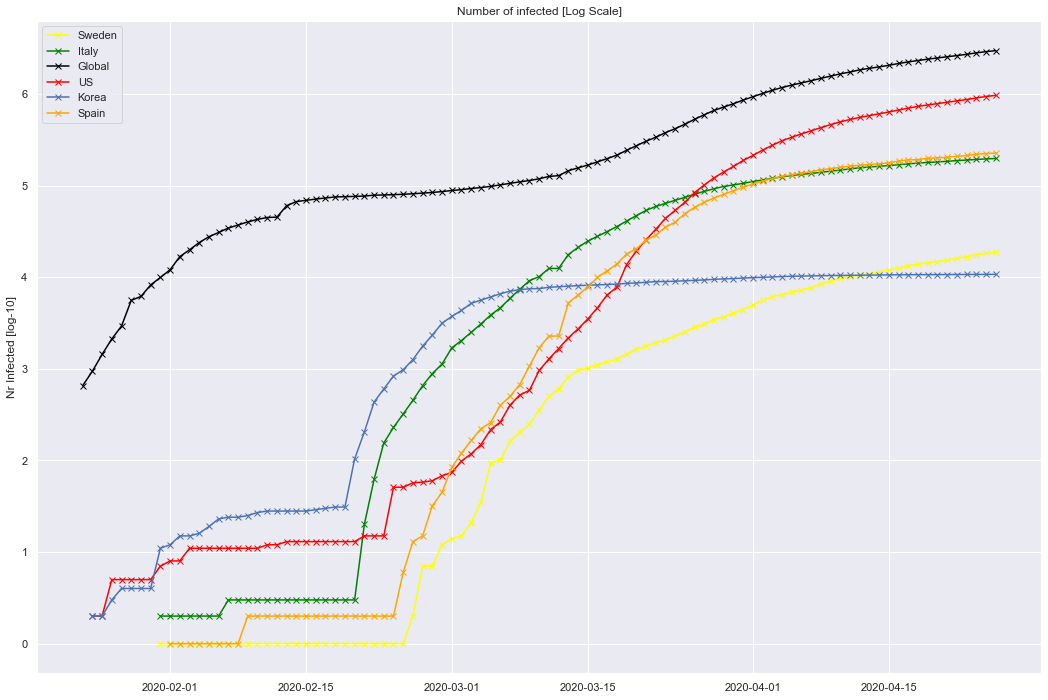

In [77]:
global_conf = np.log10(global_confirmed)

swe_conf = swe.loc[swe['confirmed'] > 0]
swe_conf = np.log10(swe_conf['confirmed'])
ita_conf = ita.loc[ita['confirmed'] > 0]
ita_conf = np.log10(ita_conf['confirmed'])
us_conf = us.loc[us['confirmed'] > 0]
us_conf = np.log10(us_conf['confirmed'])
korea_conf = korea.loc[korea['confirmed'] > 0]
korea_conf = np.log10(korea_conf['confirmed'])
spain_conf = spain.loc[spain['confirmed'] > 0]
spain_conf = np.log10(spain['confirmed'])

plt.figure(figsize=(18,12))
plt.title('Number of infected [Log Scale]')
plt.plot(swe_conf,'x-',color='yellow',label='Sweden')
plt.plot(ita_conf,'x-',color='green',label='Italy')
plt.plot(global_conf,'x-',color='black',label='Global')
plt.plot(us_conf,'x-',color='red',label='US')
plt.plot(korea_conf,'x-',color='b',label='Korea')
plt.plot(spain_conf,'x-',color='orange',label='Spain')
plt.ylabel('Nr Infected [log-10]')
plt.legend(loc='upper left')
plt.savefig('corona_evolution_countries_log.jpg',format='jpg')

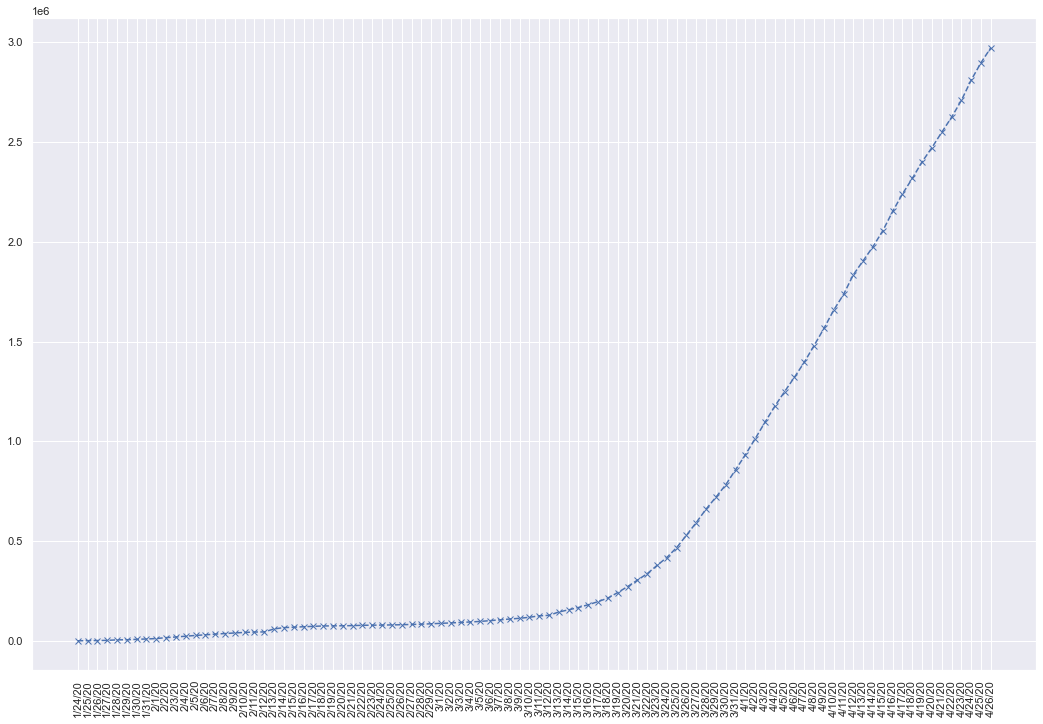

In [78]:
global_series = all_countries.sum(axis=1)
_= plt.figure(figsize=(18,12))
_= plt.plot(global_series,'x--')

_= plt.xticks(rotation=90)



In [79]:


countries_deceased = countries
all_countries_deceased = pd.DataFrame()

for c in countries_deceased:
    temp = df_deceased[df_deceased['Country/Region'] == c]
    temp = temp.groupby('Country/Region')
    temp = temp.sum().iloc[:,4:]
    temp = temp.T

    all_countries_deceased = pd.concat([all_countries_deceased,temp],axis=1)
    

def create_deceased_df(country):
    process = True
    try:
        deceased = all_countries_deceased[country]
    except KeyError:
        print ('cant find {} in deaths'.format(country))
        process = False
        
    if process:
        deceased.index = pd.to_datetime(deceased.index)
        factor = deceased / deceased.shift()

        data = pd.concat([deceased,factor],axis=1)
        data.columns = ['deceased','dead_factor']
        data.dead_factor.replace(np.inf,np.nan,inplace=True)
        data['dead_inc'] = data['deceased'] - data['deceased'].shift()
        return data

deceased_dict = dict()

for c in countries_deceased:
    
    deceased_dict[c] = create_deceased_df(c)




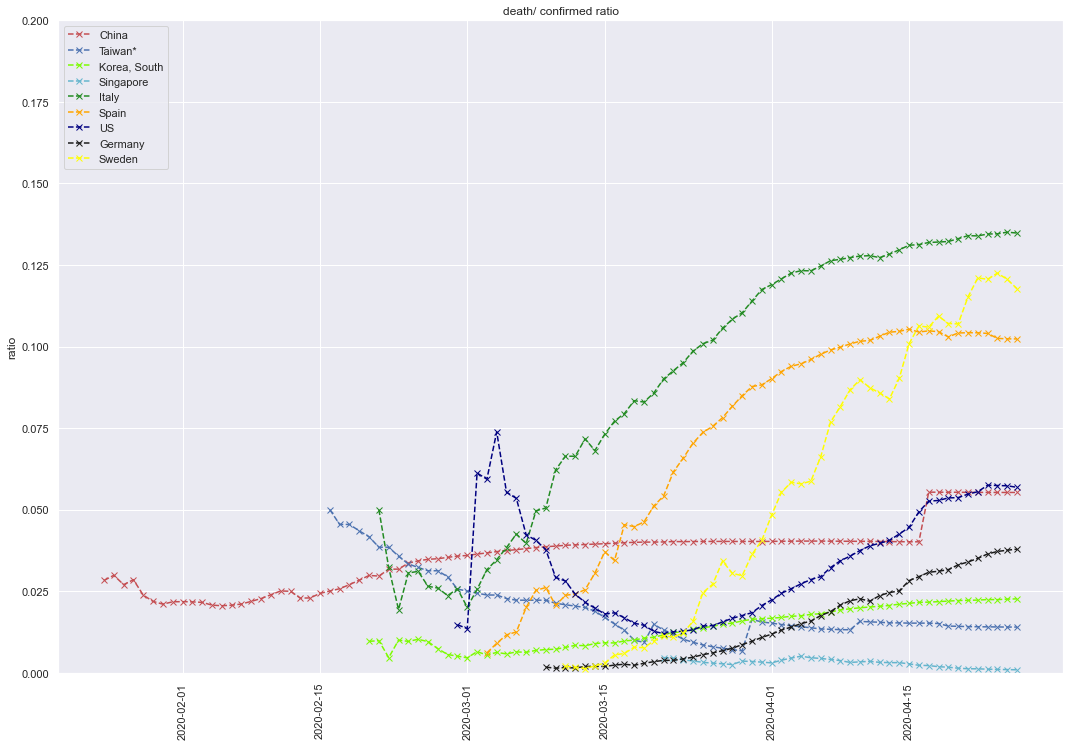

In [80]:
country_data = dict()

for c in countries:
    country_data[c] = pd.concat([confirmed_dict[c],deceased_dict[c]],axis=1)
    country_data[c]['pct_dead'] = 100 * country_data[c]['deceased'] / country_data[c]['confirmed']
    country_data[c]['conf_over_dead'] = country_data[c]['confirmed'] / country_data[c]['deceased']
    country_data[c]['conf_over_dead'] = country_data[c]['conf_over_dead'].replace(np.inf,np.nan)
    country_data[c]['dead_conf_ratio'] =  country_data[c]['dead_factor'] / country_data[c]['factor']
    

import pickle

with open ('country_data.pkl','wb') as f:
    pickle.dump(country_data,f,protocol=pickle.HIGHEST_PROTOCOL)

countries_of_interest = ['China','Taiwan*','Korea, South','Singapore',
                         'Italy','Spain','US','Germany','Sweden']

colors = ['r','b','lawngreen','c',
          'forestgreen','orange','navy','k','yellow']

plt.figure(figsize=(18,12))
plt.title('death/ confirmed ratio')

i = 0
for c in countries_of_interest:
    country = country_data[c]
    mask = country['deceased'] >= 1
    country = country[mask]
    plt.plot(country['deceased'] / country['confirmed'],'x--',
             color=colors[i],label=c)
    i += 1      

plt.ylabel('ratio')
plt.xticks(rotation=90)
plt.ylim([0,0.20])
plt.legend(loc='upper left')
#plt.yscale('log')

plt.savefig('corona_dead_conf_ratio.jpg',format='jpg')


In [81]:
country_data['Sweden'].tail(40)

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-03-18,1279,1.074790,89.0,10,1.428571,3.0,0.781861,127.900000,1.329163
2020-03-19,1439,1.125098,160.0,11,1.100000,1.0,0.764420,130.818182,0.977693
2020-03-20,1639,1.138985,200.0,16,1.454545,5.0,0.976205,102.437500,1.277054
2020-03-21,1763,1.075656,124.0,20,1.250000,4.0,1.134430,88.150000,1.162082
2020-03-22,1934,1.096994,171.0,21,1.050000,1.0,1.085832,92.095238,0.957161
2020-03-23,2046,1.057911,112.0,25,1.190476,4.0,1.221896,81.840000,1.125308
2020-03-24,2286,1.117302,240.0,36,1.440000,11.0,1.574803,63.500000,1.288819
2020-03-25,2526,1.104987,240.0,62,1.722222,26.0,2.454473,40.741935,1.558591
2020-03-26,2840,1.124307,314.0,77,1.241935,15.0,2.711268,36.883117,1.104623
2020-03-27,3069,1.080634,229.0,105,1.363636,28.0,3.421310,29.228571,1.261886


In [82]:
country_data['US'].tail(40)

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-03-18,7783,1.212116,1362.0,118,1.092593,10.0,1.516125,65.957627,0.901392
2020-03-19,13747,1.766285,5964.0,200,1.694915,82.0,1.454863,68.735000,0.959593
2020-03-20,19273,1.401979,5526.0,244,1.220000,44.0,1.266020,78.987705,0.870199
2020-03-21,25600,1.328283,6327.0,307,1.258197,63.0,1.199219,83.387622,0.947235
2020-03-22,33276,1.299844,7676.0,417,1.358306,110.0,1.253155,79.798561,1.044977
2020-03-23,43843,1.317556,10567.0,557,1.335731,140.0,1.270442,78.712747,1.013795
2020-03-24,53736,1.225646,9893.0,706,1.267504,149.0,1.313831,76.113314,1.034152
2020-03-25,65778,1.224096,12042.0,942,1.334278,236.0,1.432090,69.828025,1.090011
2020-03-26,83836,1.274529,18058.0,1209,1.283439,267.0,1.442101,69.343259,1.006991
2020-03-27,101657,1.212570,17821.0,1581,1.307692,372.0,1.555230,64.299178,1.078447


In [83]:
swe = country_data['Sweden']
swe[swe['confirmed'] > 1000].describe()

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,7859.720930,1.071829,411.139535,711.697674,1.191230,50.976744,6.264528,44.486481,1.109880
std,5581.129952,0.031235,208.542742,729.947374,0.204028,53.012796,4.117157,64.729497,0.176601
min,1022.000000,1.025472,61.000000,3.000000,1.000000,0.000000,0.293542,8.163104,0.890339
25%,2683.000000,1.046390,240.000000,69.500000,1.048810,5.000000,2.582871,9.677190,0.993994
50%,6830.000000,1.063476,407.000000,401.000000,1.124048,29.000000,5.871157,17.032419,1.062196
75%,12233.500000,1.095683,563.000000,1268.000000,1.245968,80.500000,10.339790,38.812526,1.152767
max,18640.000000,1.138985,812.000000,2194.000000,2.000000,185.000000,12.250242,340.666667,1.853128


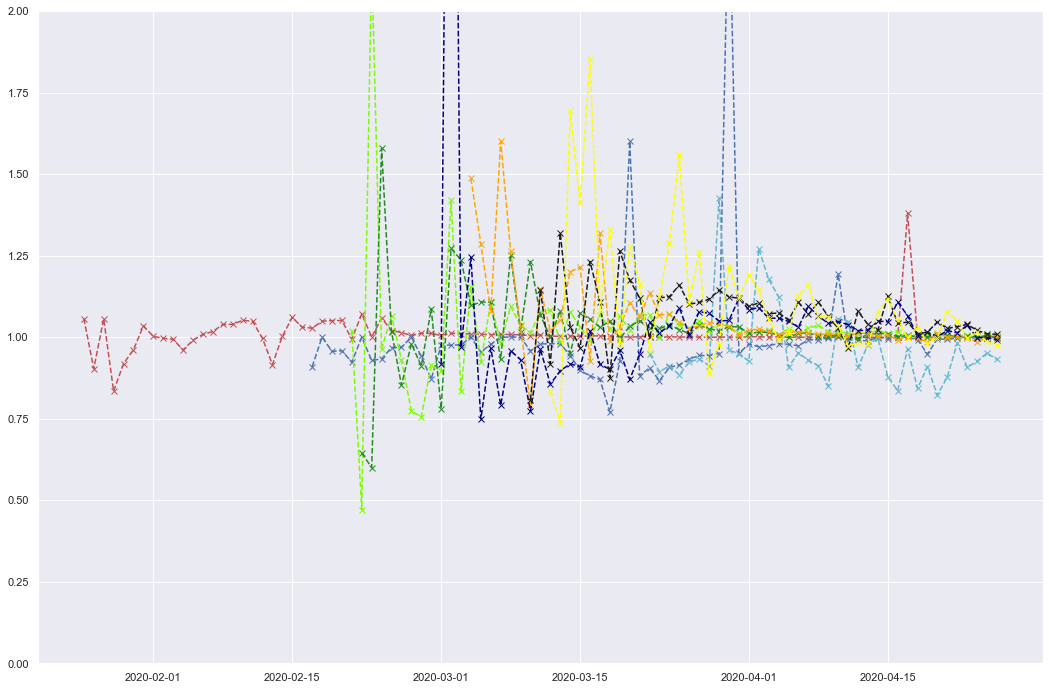

In [84]:
plt.figure(figsize=(18,12))
plt.ylim([0,2])
i = 0
for c in countries_of_interest:
    country = country_data[c]
    mask = country['deceased'] >= 1
    country = country[mask]
    plt.plot(country['dead_conf_ratio'],'x--',
             color=colors[i],label=c)
    i += 1 